In [1]:
import pandas as pd
import numpy as np

In [2]:
pd.set_option('display.max_columns', None)


In [3]:
df = pd.read_csv('athlete_events.csv')

In [4]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [5]:
region_df = pd.read_csv('noc_regions.csv')
region_df.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  object 
 2   Sex     271116 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  object 
 7   NOC     271116 non-null  object 
 8   Games   271116 non-null  object 
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  object 
 11  City    271116 non-null  object 
 12  Sport   271116 non-null  object 
 13  Event   271116 non-null  object 
 14  Medal   39783 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.0+ MB


In [7]:
df.shape

(271116, 15)

In [8]:
df = df[df['Season'] == 'Summer']

In [9]:
df.shape

(222552, 15)

In [10]:
df = df.merge(region_df, on='NOC', how='left')

In [11]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN


In [12]:
df.region.unique().shape
# no of country

(206,)

In [13]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
region       370
notes     218151
dtype: int64

In [14]:
df.duplicated().sum()

1385

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df.duplicated().sum()

0

In [17]:
df.Medal.value_counts()

Gold      11456
Bronze    11409
Silver    11212
Name: Medal, dtype: int64

In [18]:
# one hot encoding
temp_df = pd.get_dummies(df.Medal)

In [19]:
df = pd.concat([df, temp_df], axis=1)

In [20]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes,Bronze,Gold,Silver
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN,0,0,0
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN,0,0,0
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN,0,0,0
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN,0,1,0
4,8,"Cornelia ""Cor"" Aalten (-Strannood)",F,18.0,168.0,NaN,Netherlands,NED,1932 Summer,1932,Summer,Los Angeles,Athletics,Athletics Women's 100 metres,NaN,Netherlands,NaN,0,0,0


In [21]:
df.groupby('NOC').sum(numeric_only=True)[['Gold', 'Silver', 'Bronze']].sort_values('Gold', ascending=False).reset_index().head(25)

,NOC,Gold,Silver,Bronze
0,USA,2472,1333,1197
1,URS,832,635,596
2,GBR,635,729,620
3,GER,592,538,649
4,ITA,518,474,454
5,FRA,463,567,587
6,HUN,432,328,363
7,SWE,354,396,358
8,AUS,342,452,510
9,GDR,339,277,227


In [22]:
actual_medal = df.drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year','Season', 'City', 'Sport','Event', 'Medal', 'region'])

In [23]:
medal_tally = actual_medal.groupby('NOC').sum(numeric_only=True)[['Gold', 'Silver', 'Bronze']].sort_values('Gold', ascending=False).reset_index()

In [24]:
medal_tally[medal_tally['NOC'] == 'IND']

,NOC,Gold,Silver,Bronze
53,IND,9,7,12


In [25]:
medal_tally['total'] = medal_tally['Gold'] + medal_tally['Silver'] + medal_tally['Bronze']

In [26]:
medal_tally

,NOC,Gold,Silver,Bronze,total
0,USA,1035,802,708,2545
1,URS,394,317,294,1005
2,GBR,278,317,300,895
3,GER,235,261,283,779
4,FRA,234,256,287,777
...,...,...,...,...,...
225,AHO,0,1,0,1
226,LBR,0,0,0,0
227,LCA,0,0,0,0
228,LES,0,0,0,0


In [27]:
years = df.Year.unique().tolist()

In [28]:
years.sort()

In [29]:
years.insert(0, 'Overall')

In [30]:
years

['Overall',
 1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

In [31]:
country = np.unique(df.region.dropna().values.tolist())

In [32]:
country.sort()

In [33]:
country = country.tolist()

In [34]:
country.insert(0, 'Overall')

In [35]:
country

['Overall',
 'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Gui

In [36]:
def fetch_medal_tally( year, country):
    flag = 0
    medal_df = df.drop_duplicates(subset=['Team', 'NOC', 'Games', 'Year','Season', 'City', 'Sport','Event', 'Medal', 'region'])
    if year == 'Overall' and country == 'Overall':
        temp_df = medal_df
    if year == 'Overall' and country != 'Overall':
        flag=1
        temp_df = medal_df[medal_df['region'] == country]
    if year != 'Overall' and country == 'Overall':
        temp_df = medal_df[medal_df['Year'] == int(year)]
    if year != 'Overall' and country != 'Overall':
        temp_df = medal_df[(medal_df['region'] == country) & (medal_df['Year'] == int(year))]
    
    if flag == 1:
        tally = temp_df.groupby('Year').sum(numeric_only=True)[['Gold', 'Silver', 'Bronze']].sort_values('Year', ascending=True).reset_index()
    else:   
        tally = temp_df.groupby('region').sum(numeric_only=True)[['Gold', 'Silver', 'Bronze']].sort_values('Gold', ascending=False).reset_index()
    tally['total'] = tally['Gold'] + tally['Silver'] + tally['Bronze']
    return tally

In [37]:
fetch_medal_tally('Overall', 'Overall')

,region,Gold,Silver,Bronze,total
0,USA,1035,802,708,2545
1,Russia,592,498,487,1577
2,Germany,444,457,491,1392
3,UK,278,317,300,895
4,France,234,256,287,777
...,...,...,...,...,...
200,Lesotho,0,0,0,0
201,Albania,0,0,0,0
202,Libya,0,0,0,0
203,Liechtenstein,0,0,0,0


In [38]:
np.unique(df['City'].values).shape[0]

23

In [39]:
df['Sport'].unique().shape[0]

52

In [40]:
df['Name'].unique().shape[0]

116122

In [41]:
df['region'].unique().shape[0]

206

In [42]:
df['Sport'].unique().shape[0]

52

In [43]:
x = df.drop_duplicates(['Year', 'region'])['Year'].value_counts().reset_index()

In [44]:
x.rename(columns={'index': 'Edition', 'Year': 'region'}, inplace=True)

In [45]:
x.sort_values('Edition')

,Edition,region
28,1896,12
22,1900,31
27,1904,14
26,1906,20
25,1908,22
24,1912,29
23,1920,29
21,1924,45
20,1928,46
19,1932,47


In [48]:
df.drop_duplicates(['Year', 'Event'])['Year'].value_counts().reset_index()

,index,Year
0,2016,306
1,2008,302
2,2012,302
3,2004,301
4,2000,300
5,1996,271
6,1992,257
7,1988,237
8,1984,221
9,1980,203


In [49]:
df.drop_duplicates(['Year', 'Name'])['Year'].value_counts().reset_index()

,index,Year
0,2016,11174
1,2008,10880
2,2000,10639
3,2004,10537
4,2012,10502
5,1996,10324
6,1992,9380
7,1988,8443
8,1972,7105
9,1984,6791


In [50]:
x = df.drop_duplicates(['Year', 'Sport', 'Event'])

In [62]:
x.pivot_table(index='Sport', columns='Year', values='Event', aggfunc='count').fillna(0).astype(int)

Year,1896,1900,1904,1906,1908,1912,1920,1924,1928,1932,1936,1948,1952,1956,1960,1964,1968,1972,1976,1980,1984,1988,1992,1996,2000,2004,2008,2012,2016
Sport,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Aeronautics,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Alpinism,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Archery,0,8,6,0,3,0,10,0,0,0,0,0,0,0,0,0,0,2,2,2,2,4,4,4,4,4,4,4,4
Art Competitions,0,0,0,0,0,5,5,5,13,13,19,18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
Athletics,12,23,24,21,26,30,29,27,27,29,29,33,33,33,34,36,36,38,37,38,41,42,43,44,46,46,47,47,47
Badminton,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,5,5,5,5,5,5
Baseball,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,0,0
Basketball,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,2,2,2,2,2,2,2,2,2,2,2
Basque Pelota,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


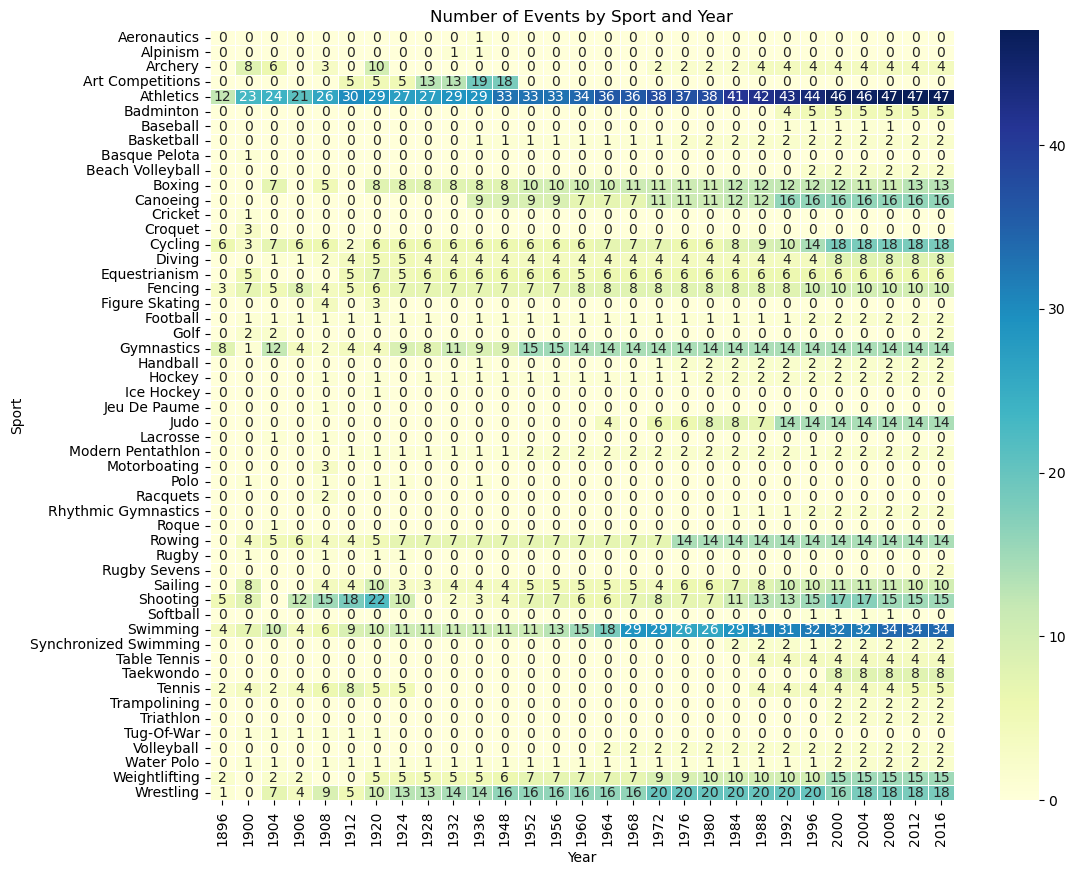

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have already created the pivot table
pivot_table = x.pivot_table(index='Sport', columns='Year', values='Event', aggfunc='count').fillna(0).astype(int)

# Create a heatmap
plt.figure(figsize=(12, 10))  # Set the figure size

# Customize the heatmap appearance
sns.heatmap(pivot_table, cmap='YlGnBu', annot=True, fmt="d", linewidths=.5)

# Set axis labels and plot title
plt.xlabel('Year')
plt.ylabel('Sport')
plt.title('Number of Events by Sport and Year')

# Display the heatmap
plt.show()


In [101]:
def most_succesful(df, selected_sport):
    temp_df = df.dropna(subset=['Medal'])
    
    if selected_sport != 'Overall':
        temp_df = temp_df[temp_df['Sport'] == selected_sport]
    
    x = temp_df['Name'].value_counts().reset_index().head(20).merge(df, right_on='Name', left_on='index', how='left')[['index', 'Name_x', 'Sport', 'region']].drop_duplicates()
    x.rename(columns={'index':'Name', 'Name_x':'Medals'}, inplace=True)
    return x

In [102]:
most_succesful(df, 'Gymnastics')

,Name,Medals,Sport,region
0,Larysa Semenivna Latynina (Diriy-),18,Gymnastics,Russia
19,Nikolay Yefimovich Andrianov,15,Gymnastics,Russia
43,Borys Anfiyanovych Shakhlin,13,Gymnastics,Russia
67,Takashi Ono,13,Gymnastics,Japan
99,Takashi Ono,13,Judo,Japan
100,Sawao Kato,12,Gymnastics,Japan
124,Aleksey Yuryevich Nemov,12,Gymnastics,Russia
145,Viktor Ivanovych Chukarin,11,Gymnastics,Russia
161,Vra slavsk (-Odloilov),11,Gymnastics,Czech Republic
179,gnes Keleti-Srkny (Klein),10,Gymnastics,Hungary


In [104]:
temp = df.dropna(subset=['Medal'])

In [ ]:
temp.drop_